# Google DA Capstone Project
## Bellabeat Smart Device Data Analysis

### Background

Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products.
Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, she would like high-level
recommendations for how these trends can inform Bellabeat marketing strategy.


### Business Task

Analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, giving high-level
recommendations for how these trends can inform Bellabeat marketing strategy.

### Business Objective

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help inﬂuence Bellabeat marketing strategy?

### Preparing Data

In [75]:
options(warn=-1)
install.packages("here")
install.packages("skimr")
install.packages("janitor")
install.packages("dplyr")
install.packages("tidyverse")
install.packages("forcats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘vctrs’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [59]:
library("here")
library("skimr")
library("janitor")
library("dplyr")
library("tidyverse")
library("forcats")

In [60]:
df_activity <- read.csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

In [61]:
head(df_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Because the ActivityDate column is not properly formatted, we should transform it to the right format

In [62]:
df_activity$ActivityDate <- as.Date(df_activity$ActivityDate, "%m/%d/%Y")

We'll also add new column for day across the week

In [63]:
df_activity$day <- weekdays(df_activity$ActivityDate)

In [64]:
head(df_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thursday
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday


#### Make all column names lowercase

In [65]:
df_activity <- rename_with(df_activity, tolower)

#### Summary statistics

In [69]:
df_activity %>%  
  select(totalsteps) %>%
  summary()

   totalsteps   
 Min.   :    0  
 1st Qu.: 3790  
 Median : 7406  
 Mean   : 7638  
 3rd Qu.:10727  
 Max.   :36019  

In [70]:
df_activity %>%  
  select(totaldistance) %>%
  summary()

 totaldistance   
 Min.   : 0.000  
 1st Qu.: 2.620  
 Median : 5.245  
 Mean   : 5.490  
 3rd Qu.: 7.713  
 Max.   :28.030  

In [71]:
df_activity %>%  
  select(calories) %>%
  summary()

    calories   
 Min.   :   0  
 1st Qu.:1828  
 Median :2134  
 Mean   :2304  
 3rd Qu.:2793  
 Max.   :4900  

From the data above, the average calories burned per day is *2304*. According to the Dietary Guidelines for Americans 2020–2025, the average adult woman expends roughly *1,600* to *2,400* calories per day. Less calories burned than gained can make a person gain weight.

### Analyzing Data

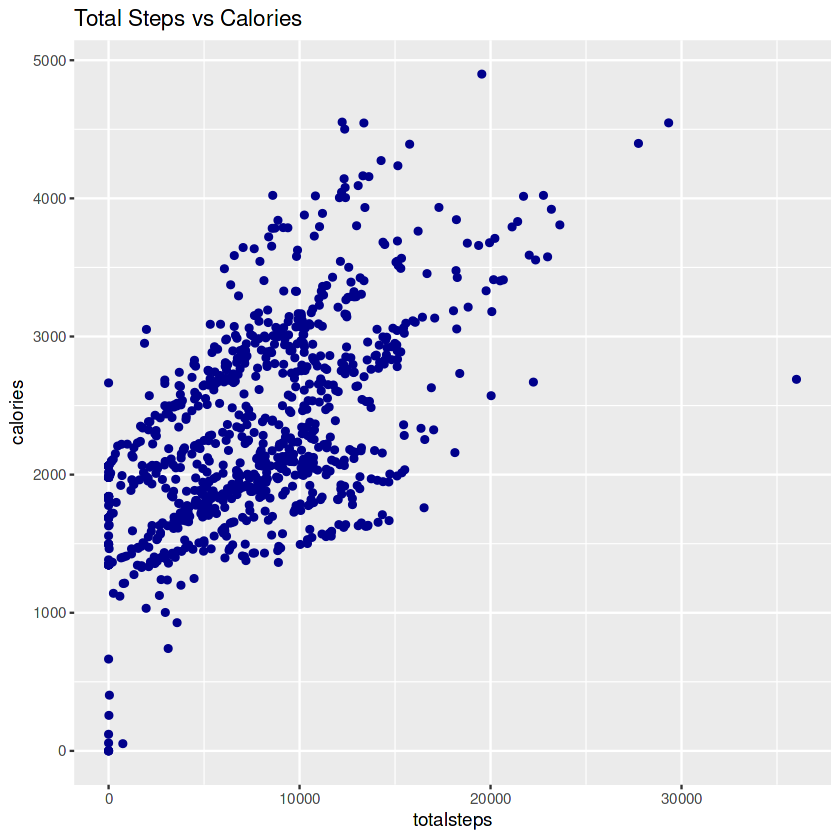

In [67]:
ggplot(data=df_activity, aes(x=totalsteps, y=calories)) + geom_jitter(color="darkblue") + labs(title="Total Steps vs Calories")

The graphic above shows positive relation between steps taken and calories burned. It means that the more steps a person takes, the more calories that person burned.

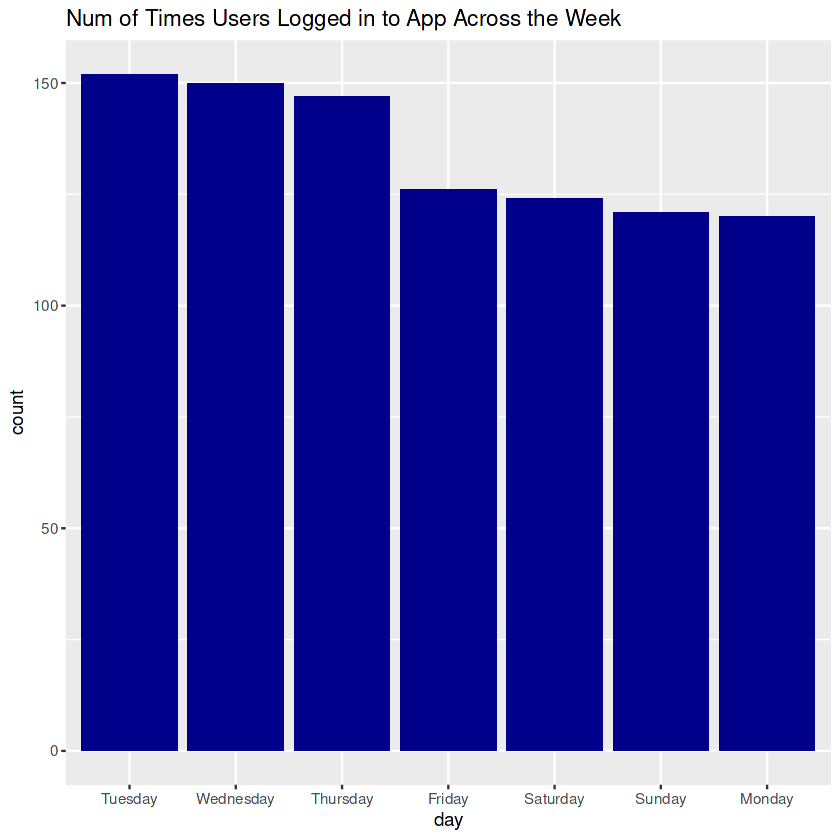

In [68]:
df_activity %>%
    ggplot(aes(x=fct_infreq(day))) + 
    geom_bar(fill="darkblue") +
    labs(x = "day", title="Num of Times Users Logged in to App Across the Week")

From the graphic above, we can conclude that the app usages decreases on the weekend.

According to healthreporter website, doctors consider anything less than *5000* steps a day to be sedentary lifestyle

In [74]:
df_activity_new <- df_activity %>% 
                    group_by(id) %>% 
                    summarise(mean_steps=mean(totalsteps), .groups = 'drop')
filter(df_activity_new, mean_steps < 5000)

id,mean_steps
<dbl>,<dbl>
1844505072,2580.065
1927972279,916.129
2320127002,4716.871
4020332650,2267.226
4057192912,3838.000
4445114986,4796.548
6775888955,2519.692
8792009665,1853.724


There are still around 24.24% respondents who have average daily steps under *5000* steps, and can be considered having a sedentary lifestyle 

### Conclusions

From our analysis, we can conclude some points:
* The more steps a person takes, the more calories that person burns
* The respondents average calories burned per day are close to the calories average adult women gains per day
* Number of app login decreases on weekend
* Around 24.24% respondents can be considered having a sedentary lifestyle

Using these insights, the team and business can consider adding new features to the app, or they can also use them to tweak their marketing strategy.

### Recommendations

* The Fitbit marketing team could promote that by using Fitbit smart device, customers can monitor calories burned and steps taken per day and atleast reach the minimum recommendation that'd lead to a healthier life
* Fitbit app could add feature where users get daily notification to remind users to log on to Fitbit app, especially on weekend
* Fitbit could educate customers more on how to maintain a healthy life